In [4]:
%pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 18.0 MB/s eta 0:00:00


In [7]:
from typing import Annotated
from typing_extensions import TypedDict
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]
    valid_input: bool | None

# Node 1
def processing_node(state: State):
  pass

# Node 2
def process_search(state: State):
  pass

# Node 3
def format_output(state: State):
    pass

# Build the Graph
graph_builder = StateGraph(State)

# Add nodes
graph_builder.add_node("process_input", processing_node)
graph_builder.add_node("process_search", process_search)
graph_builder.add_node("format_output", format_output)

# Add edges
graph_builder.add_edge(START, "process_input")
graph_builder.add_conditional_edges(
    "process_input",
    lambda state: state.get("valid_input", False),
    {
        True: "process_search",
        False: END
    }
)
graph_builder.add_conditional_edges(
    "process_search",
    lambda state: state.get("valid_input", False),
    {
        True: "format_output",
        False: END
    }
)
graph_builder.add_edge("format_output", END)

# Compile graph
graph = graph_builder.compile()

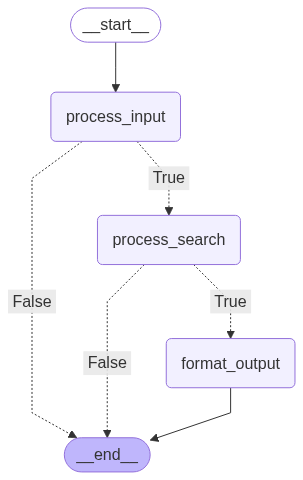

In [8]:
from IPython.display import Image

Image(graph.get_graph().draw_mermaid_png())